<a href="https://colab.research.google.com/github/MeiTriCahyani/Tes/blob/main/clustering_mental_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [ ]:
df=pd.read_csv('/content/Combined Data.csv')
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [ ]:
df.drop('CustomerID',axis = 1,inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [ ]:
df.shape

(200, 4)

In [ ]:
a = df.iloc[:,2]
b = df.iloc[:,3]
plt.scatter(a,b)
plt.show()

# **Modeling**

In [ ]:
X = df.iloc[:, [2,3]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
WCSS = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

In [ ]:
WCSS

[269981.28000000014,
 183653.3289473683,
 106348.37306211119,
 73880.64496247198,
 44448.45544793369,
 40825.16946386947,
 33642.57922077922,
 26686.837785187785,
 24766.471609793436,
 23103.122085983905]

# **Elbow Curve**

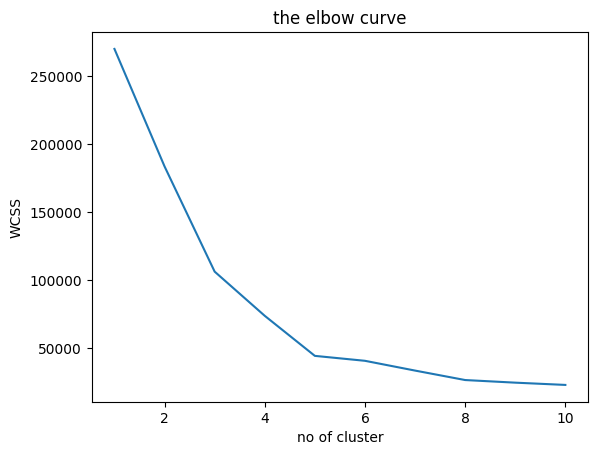

In [ ]:
plt.plot(range(1,11),WCSS)
plt.title('the elbow curve')
plt.xlabel('no of cluster')
plt.ylabel('WCSS')
plt.show()

Rebult the model

In [ ]:
kmeans = KMeans(n_clusters = 5 , init = 'k-means++', random_state = 42)
kmeans

KMeans(n_clusters=5, random_state=42)

# **Predict**

In [ ]:
k_pred = kmeans.fit_predict(X)

In [ ]:
k_pred

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

# **Visualization of Scatterplot**

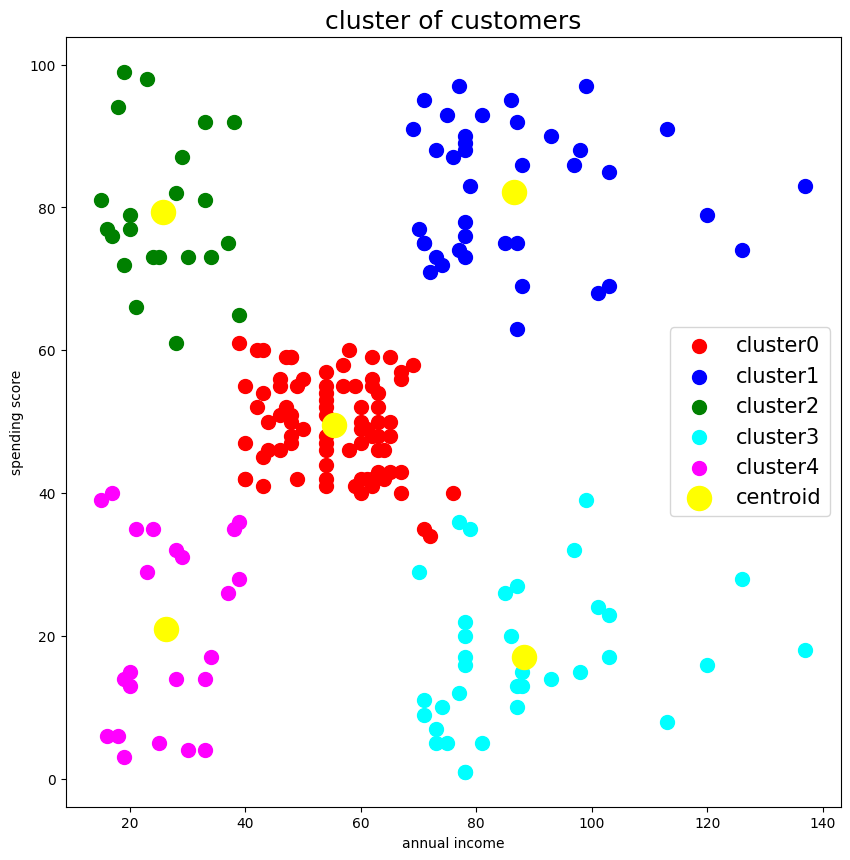

In [ ]:
# plt.savefig('subplot.jpg')
plt.figure(1,figsize=(10,10))
plt.scatter(X[k_pred==0,0], X[k_pred ==0,1],s = 100 ,c = 'red', label = 'cluster0')
plt.scatter(X[k_pred==1,0], X[k_pred ==1,1],s = 100 ,c = 'blue', label = 'cluster1')
plt.scatter(X[k_pred==2,0], X[k_pred ==2,1],s = 100 ,c = 'green', label = 'cluster2')
plt.scatter(X[k_pred==3,0], X[k_pred ==3,1],s = 100 ,c = 'cyan', label = 'cluster3')
plt.scatter(X[k_pred==4,0], X[k_pred ==4,1],s = 100 ,c = 'magenta', label = 'cluster4')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 300,c = 'yellow', label = 'centroid')
plt.rcParams.update({'font.size': 15})
plt.title('cluster of customers')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.legend()
plt.show()

In [ ]:
df['cluster'] = pd.DataFrame(k_pred)

In [ ]:
df.cluster.value_counts()

,count
cluster,
0,81
1,39
3,35
4,23
2,22


In [ ]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,4
1,Male,21,15,81,2
2,Female,20,16,6,4
3,Female,23,16,77,2
4,Female,31,17,40,4
...,...,...,...,...,...
195,Female,35,120,79,1
196,Female,45,126,28,3
197,Male,32,126,74,1
198,Male,32,137,18,3


In [ ]:
cluster0 = df[df['cluster']==0]
cluster1 = df[df['cluster']==1]
cluster2 = df[df['cluster']==2]
cluster3 = df[df['cluster']==3]
cluster4 = df[df['cluster']==4]

In [ ]:
cluster0

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
43,Female,31,39,61,0
46,Female,50,40,55,0
47,Female,27,40,47,0
48,Female,29,40,42,0
49,Female,31,40,42,0
...,...,...,...,...,...
121,Female,38,67,40,0
122,Female,40,69,58,0
126,Male,43,71,35,0
132,Female,25,72,34,0


In [ ]:
c=pd.crosstab(df.Gender,df.cluster,margins = True)
c

cluster,0,1,2,3,4,All
Gender,,,,,,
Female,48,21,13,16,14,112
Male,33,18,9,19,9,88
All,81,39,22,35,23,200


<Axes: xlabel='Gender'>

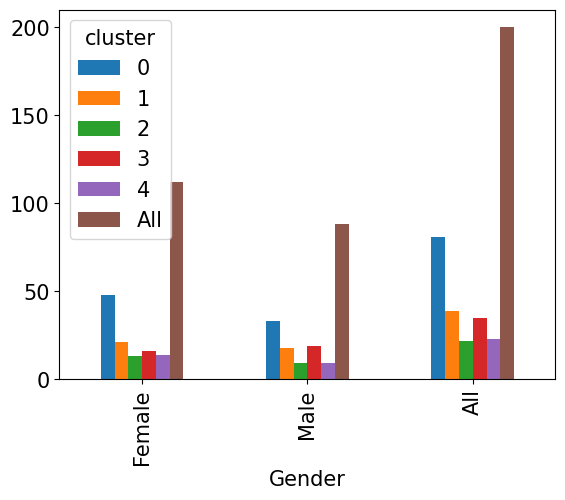

In [ ]:
c.plot(kind='bar',stacked=False)

In [ ]:
pd.crosstab(df.Age,df.cluster,margins = True)

cluster,0,1,2,3,4,All
Age,,,,,,
18,3,0,1,0,0,4
19,5,0,0,2,1,8
20,1,0,2,1,1,5
21,2,0,3,0,0,5
22,1,0,2,0,0,3
23,2,0,3,1,0,6
24,1,0,3,0,0,4
25,1,0,1,1,0,3
26,2,0,0,0,0,2


In [ ]:
pd.crosstab(df['Annual Income (k$)'],df.cluster,margins = True)

cluster,0,1,2,3,4,All
Annual Income (k$),,,,,,
15,0,0,1,0,1,2
16,0,0,1,0,1,2
17,0,0,1,0,1,2
18,0,0,1,0,1,2
19,0,0,2,0,2,4
...,...,...,...,...,...,...
113,0,1,0,1,0,2
120,0,1,0,1,0,2
126,0,1,0,1,0,2


In [ ]:
g = df.groupby('cluster').mean(numeric_only=True)
print(g)

               Age  Annual Income (k$)  Spending Score (1-100)
cluster                                                       
0        42.716049           55.296296               49.518519
1        32.692308           86.538462               82.128205
2        25.272727           25.727273               79.363636
3        41.114286           88.200000               17.114286
4        45.217391           26.304348               20.913043


<Axes: xlabel='cluster'>

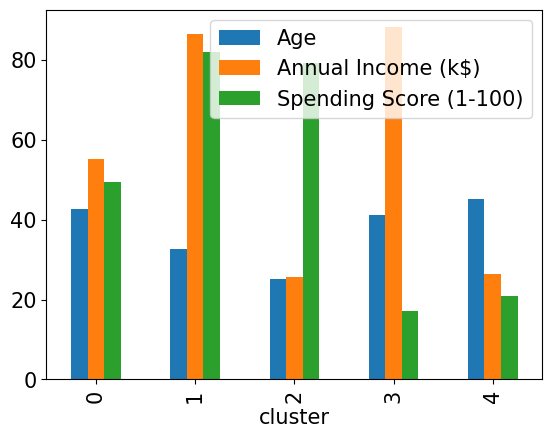

In [ ]:
g.plot(kind='bar',stacked=False)

# **To Save Cluster Wise Data**

In [ ]:
cluster1.to_csv('cluster1.csv')